Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [9]:
parent_dir = '../../data/count/'

df = pd.read_csv(f'{parent_dir}/aggregate_energy_results.csv')


Preview the Data

In [10]:
print("Data:")
print(df.shape)
df.head(15)

Data:
(4, 4)


,Iterations,N,Erlang Energy Consumption(J),Scala Energy Consumption(J)
0,10,1000000,10.673546,88.214230
1,10,5000000,95.064758,419.574004
2,10,10000000,201.879635,1090.737796
3,10,50000000,968.051867,5537.078257


Add Custom Column for N

In [11]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

In [12]:
df['_N'] = "N=" + df['N'].apply(format_number_str)  
df.head(15)

,Iterations,N,Erlang Energy Consumption(J),Scala Energy Consumption(J),_N
0,10,1000000,10.673546,88.214230,N=1M
1,10,5000000,95.064758,419.574004,N=5M
2,10,10000000,201.879635,1090.737796,N=10M
3,10,50000000,968.051867,5537.078257,N=50M


Visualize the Data

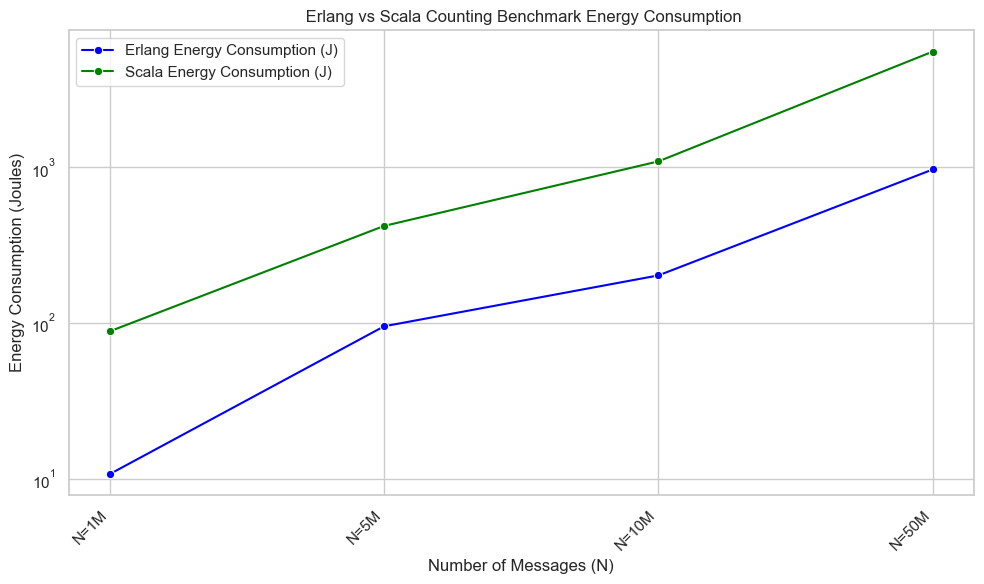

In [13]:
# Set the plot style
sns.set_theme(style="whitegrid", palette="muted")

# Plotting the energy consumption
plt.figure(figsize=(10, 6))

# Plot Erlang and Scala energy consumption
sns.lineplot(x="_N", y="Erlang Energy Consumption(J)", data=df, marker='o', label="Erlang Energy Consumption (J)", color="blue")
sns.lineplot(x="_N", y="Scala Energy Consumption(J)", data=df, marker='o', label="Scala Energy Consumption (J)", color="green")

# Adding labels and title
plt.xlabel("Number of Messages (N)")
plt.ylabel("Energy Consumption (Joules)")
plt.title(" Erlang vs Scala Counting Benchmark Energy Consumption")
# plt.xscale("log")
plt.yscale("log")

# # Display legend
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
